<a href="https://colab.research.google.com/github/evpozdniakov/ds_projects/blob/master/project1/DataSciencePython13Module9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

# %matplotlib inline
# %config InlineBackend.print_figure_kwargs = {'bbox_inches':'tight'}

sns.set_style("whitegrid")
colors = sns.color_palette("pastel")
figsize = (6, 4)
figsize2 = (10, 4)
figsize3 = (14, 4)

In [6]:
churn_orig = pd.read_csv('https://raw.githubusercontent.com/evpozdniakov/ds_projects/master/project1/churn.csv')
churn_orig.drop(columns='RowNumber', inplace=True)
churn_orig['Age'] = churn_orig['Age'].astype(np.int8)
churn_orig['Tenure'] = churn_orig['Tenure'].astype(np.int8)
churn_orig['NumOfProducts'] = churn_orig['NumOfProducts'].astype(np.int8)
churn_orig['Gender'] = churn_orig['Gender'].astype('category')
churn_orig['Geography'] = churn_orig['Geography'].astype('category')
churn_orig['HasCrCard'] = churn_orig['HasCrCard'].astype(np.int8)
churn_orig['IsActiveMember'] = churn_orig['IsActiveMember'].astype(np.int8)
churn_orig['Exited'] = churn_orig['Exited'].astype(np.int8)

def churncp():
  return churn_orig.copy()


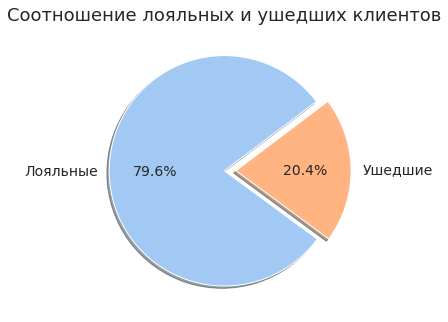

In [7]:
# 9.1. Каково соотношение ушедших и лояльных клиентов?
# Покажите это на графике и дайте комментарий по соотношению.

ch = churncp()

loyal_vs_ex = ch.groupby('Exited')['Exited'].count().transform(lambda x: x / ch.shape[0] * 100)

fig = plt.figure('9.1', figsize=figsize)
ax = fig.add_axes([0,0,1,1])

ax.pie(
    loyal_vs_ex, 
    explode=[0, 0.1], 
    labels=['Лояльные', 'Ушедшие'], 
    autopct='%1.1f%%',
    textprops={'fontsize': 14},
    shadow=True,
    startangle=37,
    colors=colors
)

ax.set_title('Соотношение лояльных и ушедших клиентов', fontsize=18);

# Комментарий
# -----------
# Из графика мы видим что соотношение ушедших клиентов к лояльным составляет пропорцию 1:4.
# Иначе говоря, из каждых пяти пришедших клиентов остаются лишь четыре, а один уходит.

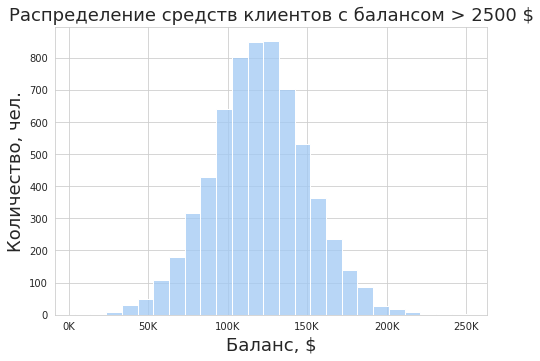

In [8]:
# 9.2. Постройте график, показывающий распределение баланса пользователей,
# у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

ch = churncp()

mask = ch['Balance'] > 2500

data = ch[mask]

fig = plt.figure('9.2', figsize=figsize)
ax = fig.add_axes([0,0,1,1])

sns.histplot(ax=ax, data=data, x='Balance', bins=25, color=colors[0])

ax.set_xticks([x * 1e4 for x in range(0, 30, 5)])
ax.set_xticklabels([f"{round(x)}K" for x in ax.get_xticks()/1000])

ax.set_title('Распределение средств клиентов с балансом > 2500 $', fontsize=18)
ax.set_xlabel('Баланс, $', fontsize=18)
ax.set_ylabel('Количество, чел.', fontsize=18);

# Комментарий
# -----------
# Из графика мы видим, что распределение денежных средств на счетах клиентов
# с балансом более 2500$ соответствует нормальному распределению:
# - небольшое кол-во клиентов с балансом 50K $ и менее
# - небольшое кол-во клиентво с балансом 190K $ и более
# - больше всего клиентов (~3500 человек) с балансом от 90K до 150K $
# 
# Вывод
# -----
# Если предположить, что уходящие клиенты являются среднестатистическими
# (то есть имеют такой же баланс, как и лояльные), то сохранение хотя бы половины из ушедших
# позволило бы банку получить дополнительных активов на сумму не менее 42 млн. долларов
# 
# 120K * 3500 * 0.2 / 2 ≈ 42M
# 
# здесь 
#   120K - баланс среднестатистического клиента
#   3500 - приблизительное кол-во клиентов с таким балансом
#   0.2 - это 20% ушедших клиентов
#   1/2 - это половина из ушедших клиентов

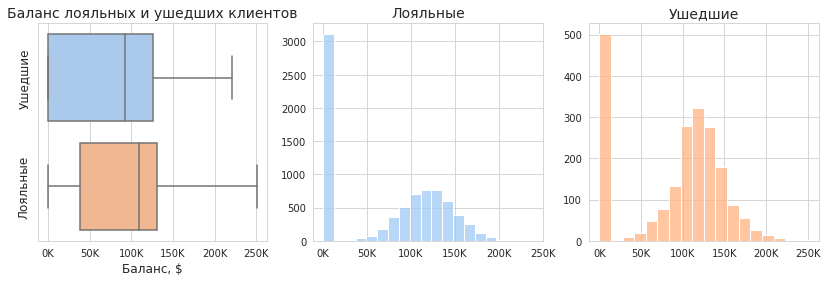

In [9]:
# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока.
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов?
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

ch = churncp()

fig = plt.figure('9.3', figsize=figsize3) 
axes = fig.subplots(1, 3)
ax = axes[0]

sns.boxplot(ax=ax, data=ch, y='Exited', x='Balance', orient='h', palette="pastel")

ax.set_xticks([x * 1e4 for x in range(0, 30, 5)])
ax.set_xticklabels([f"{round(x)}K" for x in ax.get_xticks()/1000])

ax.set_yticks([1, 0])
ax.set_yticklabels(['Лояльные', 'Ушедшие'], fontsize=12, rotation=90, va='center')

ax.set_title('Баланс лояльных и ушедших клиентов', fontsize=14)
ax.set_xlabel('Баланс, $', fontsize=12)
ax.set_ylabel('')

def hist(ax, data, color):
  sns.histplot(ax=ax, data=data, x='Balance', color=color)
  ax.tick_params(left=False, bottom=False)
  ax.set_xticks([x * 1e4 for x in range(0, 30, 5)])
  ax.set_xticklabels([f"{round(x)}K" for x in ax.get_xticks()/1000])
  ax.set_ylabel('')
  ax.set_xlabel('')


hist(axes[1], ch[ch['Exited'] == 0], colors[0])
axes[1].set_title('Лояльные', fontsize=14)

hist(axes[2], ch[ch['Exited'] == 1], colors[1])
axes[2].set_title('Ушедшие', fontsize=14);

# Комментарий
# -----------
# Количество клиентов с нулевым балансом намного больше среди лояльных клиентов.
# Возможно они пользуются банком не для того, чтобы хранить там свои деньги и получать проценты,
# а ради каких-то иных услуг. Среди ушедших клиентов подавляющее большинство это люди
# со значительными средствами на счету. Возможно у банка нет инструмента, позволяющего клиентам
# получать годовые проценты за хранение своих сбережений, или данную услугу лучше предоставляют конкуренты.

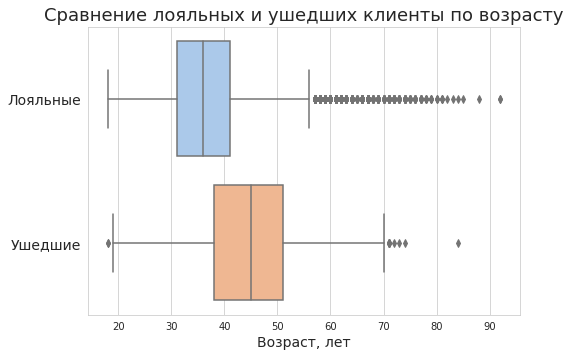

In [10]:
# 9.4. Посмотрите на распределение возраста в разрезе признака оттока.
# В какой группе больше потенциальных выбросов? 
# На какую возрастную категорию клиентов стоит обратить внимание банку?

ch = churncp()

fig = plt.figure('9.4', figsize=figsize)
ax = fig.add_axes([0,0,1,1])

sns.boxplot(ax=ax, data=ch, y='Exited', x='Age', orient='h', palette="pastel")

ax.set_title('Сравнение лояльных и ушедших клиенты по возрасту', fontsize=18)
ax.set_xlabel('Возраст, лет', fontsize=14)
ax.set_ylabel('')
ax.set_yticklabels(['Лояльные', 'Ушедшие'], fontsize=14);

# Комментарий
# -----------
# Лояльные клиенты это, в основном, люди в возрасте от 30 до 40.
# (Хотя в этой группе много потенциальных выбросов, людей от 55 вплоть до 95.)
# Основную часть ушедших клиентов составляют люди от 40 до 50.
# Банку следуюет обратить внимание прежде всего на эту возрастную категорию.


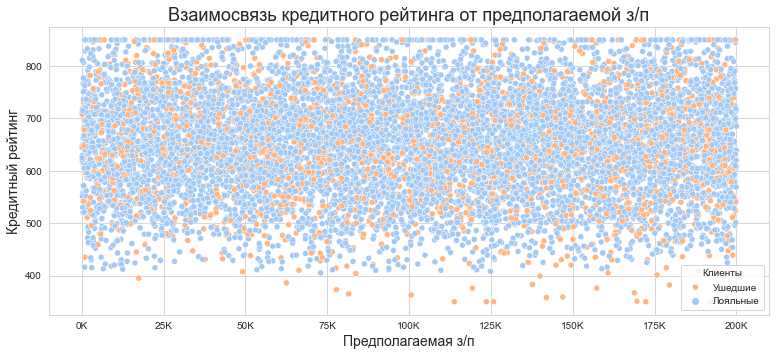

In [ ]:
# 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента
# и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов.
# Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

ch = churncp()

fig = plt.figure('9.5', figsize=figsize2)
ax = fig.add_axes([0,0,1,1])

sns.scatterplot(ax=ax, data=ch, x='EstimatedSalary', y='CreditScore', hue='Exited', palette='pastel')

ax.set_xticks([x * 25e3 for x in range(0, 9)])
ax.set_xticklabels([f"{round(x)}K" for x in ax.get_xticks()/1000])

ax.set_title('Взаимосвязь кредитного рейтинга от предполагаемой з/п', fontsize=18)
ax.set_xlabel('Предполагаемая з/п', fontsize=14)
ax.set_ylabel('Кредитный рейтинг', fontsize=14)

ax.legend(title='Клиенты', labels=['Ушедшие', 'Лояльные'])
ax.grid(True)

# Комментарий
# -----------
# Из графика мы видим что не существует четкой взаимосвязи между 
# предполагаемой заработной платой и кредтиным рейтингом 
# ни среди лояльных, ни среди ушедших клиентов.


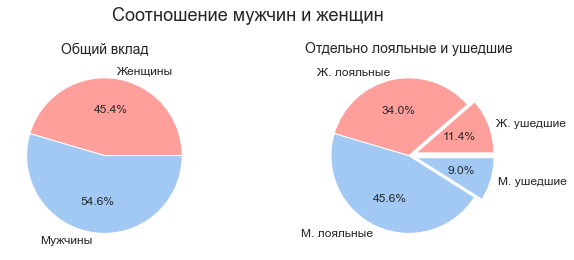

In [ ]:
# 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

ch = churncp()

male_female = ch.copy()[['Gender', 'Exited']]
male_female['Status'] = male_female['Exited'].apply(lambda x: 'Loyal' if x == 0 else 'Exited')
data1 = male_female.groupby('Gender')['Exited'].count().reset_index()
data2 = male_female.groupby(['Gender', 'Status'])['Exited'].count().reset_index()
data2.loc[2], data2.loc[3] = data2.loc[3], data2.loc[2]


fig = plt.figure('9.6', figsize=figsize2)
fig.subplots_adjust(top=0.8)
fig.suptitle('Соотношение мужчин и женщин', fontsize=18)
axes = fig.subplots(1, 2)

axes[0].pie(
    data1.Exited,
    # explode=[0, 0.1], 
    labels=['Женщины', 'Мужчины'], 
    autopct='%1.1f%%',
    textprops={'fontsize': 12},
    # shadow=True,
    startangle=0,
    colors=[colors[3], colors[0]]
)

axes[0].set_title('Общий вклад', fontsize=14)
axes[1].set_title('Отдельно лояльные и ушедшие', fontsize=14)

axes[1].pie(
    data2.Exited,
    explode=[0.1, 0, 0, 0.1], 
    labels=['Ж. ушедшие', 'Ж. лояльные', 'М. лояльные', 'М. ушедшие'], 
    autopct='%1.1f%%',
    textprops={'fontsize': 12},
    # shadow=True,
    startangle=0,
    colors=[colors[3], colors[3], colors[0], colors[0]]
);

# Комментарий
# -----------
# Женщины перестают быть клиентами банка чаще чем мужчины.
# Из банка уходит каждая четвертая женщина и каждый шестой мужчина,
# хотя в абсолютных цифрах эта разница не столь заметна, поскольку
# клиентов мужчин на 10% больше.



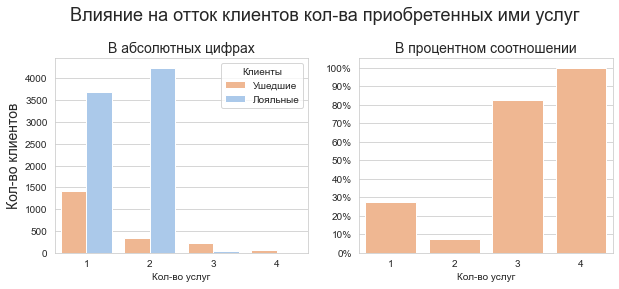

In [ ]:
# 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг?
# Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

ch = churncp()
ch['Клиенты'] =  ch['Exited'].apply(lambda x: 'Ушедшие' if x == 1 else 'Лояльные')

fig = plt.figure('9.7', figsize=figsize2)
fig.subplots_adjust(top=0.8)
fig.suptitle('Влияние на отток клиентов кол-ва приобретенных ими услуг', fontsize=18)

axes = fig.subplots(1, 2)
ax = axes[0]

sns.barplot(
    ax=ax,
    data=ch,
    x='NumOfProducts',
    y='CustomerId',
    hue='Клиенты',
    estimator=len,
    palette=[colors[1], colors[0]],
)

ax.set_title('В абсолютных цифрах', fontsize=14)
ax.set_ylabel('Кол-во клиентов', fontsize=14)
ax.set_xlabel('Кол-во услуг')


data = ch[['NumOfProducts', 'Exited']]
data = data.groupby('NumOfProducts')['Exited'].mean().reset_index()
data['Percent'] = round(data['Exited'] * 100, 1)

ax2 = axes[1]

sns.barplot(ax=ax2, data=data, x='NumOfProducts', y='Percent', color=colors[1])

ax2.set_title('В процентном соотношении', fontsize=14)
ax2.set_ylabel('')
ax2.set_yticks(range(0, 101, 10))
ax2.set_yticklabels([f'{x}%' for x in range(0, 101, 10)])
ax2.set_xlabel('Кол-во услуг');

# Комментарий
# -----------
# В абсолютных цифрах банк теряет больше всего тех клиентов, 
# которые пользуются лишь только одной услугой. На них стоит обратить внимание
# в первую очередь.
# Также важно отметить, что клиенты с тремя и четырьмя услугами почти наверняка
# уйдут из банка.
# Самыми лояльными являются клиенты с двумя услугами: только 7% из них уходят.
# Если бы в данных была информация идентифицирующая услуги (название или ID),
# то можно было бы сделать более глубокий анализ влияния этого признака.


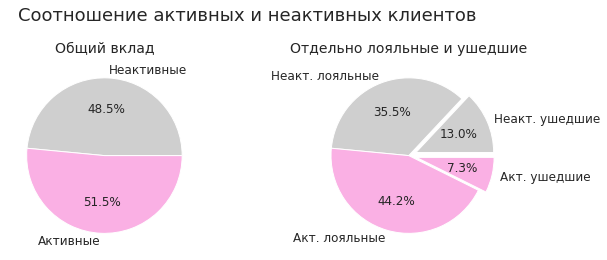

In [11]:
# 9.8. Как влияет наличие статуса активного клиента на отток клиентов? 
# Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, 
# чтобы уменьшить отток клиентов среди неактивных?

ch = churncp()

active_inactive = ch.copy()[['IsActiveMember', 'Exited']]
active_inactive['Status'] = active_inactive['Exited'].apply(lambda x: 'Loyal' if x == 0 else 'Exited')
active_inactive.rename(columns={'Exited': 'Count'}, inplace=True)
data1 = active_inactive.groupby('IsActiveMember')['Count'].count().reset_index()
data2 = active_inactive.groupby(['IsActiveMember', 'Status'])['Count'].count().reset_index()
data2.loc[2], data2.loc[3] = data2.loc[3], data2.loc[2]


fig = plt.figure('9.8', figsize=figsize2)
fig.subplots_adjust(top=0.8)
fig.suptitle('Соотношение активных и неактивных клиентов', fontsize=18)
axes = fig.subplots(1, 2)

axes[0].pie(
    data1.Count,
    labels=['Неактивные', 'Активные'], 
    autopct='%1.1f%%',
    textprops={'fontsize': 12},
    startangle=0,
    colors=[colors[7], colors[6]]
)

axes[0].set_title('Общий вклад', fontsize=14)
axes[1].set_title('Отдельно лояльные и ушедшие', fontsize=14)

axes[1].pie(
    data2.Count,
    explode=[0.1, 0, 0, 0.1], 
    labels=['Неакт. ушедшие', 'Неакт. лояльные', 'Акт. лояльные', 'Акт. ушедшие'], 
    autopct='%1.1f%%',
    textprops={'fontsize': 12},
    startangle=0,
    colors=[colors[7], colors[7], colors[6], colors[6]]
);

# Комментарий
# -----------
# Неактивные клиенты примерно в два раза чаще уходят из банка.
# Возможно стоит предложить неактивным клиентом стать участниками
# какой-то бонусной прогаммы.



In [12]:
# 9.9. В какой стране доля ушедших клиентов больше? 
# Постройте тепловую картограмму, которая покажет это соотношение на карте мира. 
# Предположите, с чем это может быть связано.

ch = churncp()

ch = ch[['Geography', 'Exited']]
ch = ch.groupby('Geography').agg(['count', 'sum']).reset_index()

ch['ExitedPercent'] = round(ch['Exited']['sum'] / ch['Exited']['count'] * 100, 1)

ch.rename(columns={'ExitedPercent': 'Процент ушедших', 'Geography': 'Страна'}, inplace=True)

fig = px.choropleth(
    data_frame=ch,
    locations='Страна',
    locationmode = 'country names',
    color='Процент ушедших',
    range_color=[0, 50],
    title='География распределения ушедших клиентов',
    width=600,
    height=400,
    color_continuous_scale='Reds',
    scope='europe',
)

fig.show();

# Комментарий
# -----------
# Во Франции и Испании процент ушедших почти одинаковый.
# В Германии же он в два раза выше. Возможно это связано
# с недостаточным количеством отделений в этой стране,
# с плохой локализацией сервисов, со слишком долгим временем
# ожидания ответа на звонок и пр.


Text(0.5, 15.0, 'Продолжительность использования')

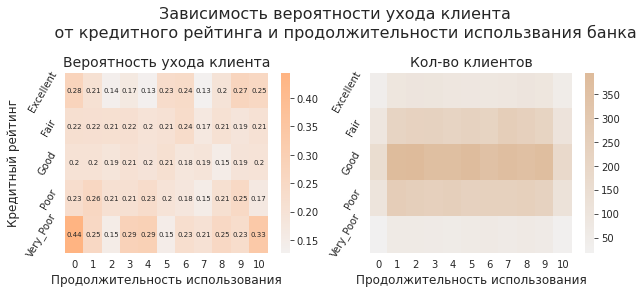

In [13]:
# 9.10. Переведите числовой признак CreditScore в категориальный. 
# Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. 
# Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
# Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), 
# а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). 
# В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
# На основе полученной сводной таблицы постройте тепловую карту с аннотацией. 
# Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 851:
        return "Top"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score < 300:
        return "Deep"

ch = churncp()

ch['CreditScoreCat'] = ch['CreditScore'].apply(get_credit_score_cat)

data = ch.pivot_table(
    index='CreditScoreCat',
    columns='Tenure',
    values='Exited',
    aggfunc='mean',
)

fig = plt.figure('9.10', figsize=figsize2)
fig.subplots_adjust(top=0.75)
fig.suptitle('Зависимость вероятности ухода клиента\n\
    от кредитного рейтинга и продолжительности использвания банка', fontsize=16)
axes = fig.subplots(1, 2)
ax = axes[0]

sns.heatmap(
    ax=ax,
    data=data,
    annot=True,
    annot_kws={'size': 7},
    cmap=sns.light_palette(colors[1], as_cmap=True)
)

ax.set_title('Вероятность ухода клиента', fontsize=14)

ax.set_ylabel('Кредитный рейтинг', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=60)
ax.set_xlabel('Продолжительность использования', fontsize=12)


data2 = ch.pivot_table(
    index='CreditScoreCat',
    columns='Tenure',
    values='Exited',
    aggfunc='count',
)

ax2 = axes[1]

sns.heatmap(
    ax=ax2,
    data=data2,
    cmap=sns.light_palette(colors[5], as_cmap=True)
)

ax2.set_title('Кол-во клиентов', fontsize=14)

ax2.set_ylabel('')
ax2.set_yticklabels(ax.get_yticklabels(), rotation=60)
ax2.set_xlabel('Продолжительность использования', fontsize=12)

# Комментарий
# -----------
# Наибольшая вероятность ухода среди новых клиентов
# (которые пользуются услугами банка менее одного года)
# с низким кредитным рейтингом (до 500 пунктов). С другой стороны
# данная категория является одной из самых малочисленных.
